In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df1 = pd.read_csv('titanic_train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


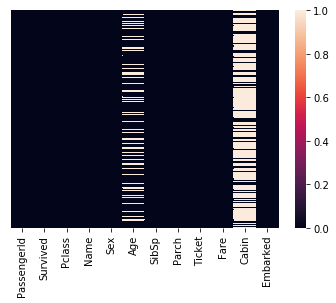

In [3]:
sns.heatmap(df1.isnull(),yticklabels = False)

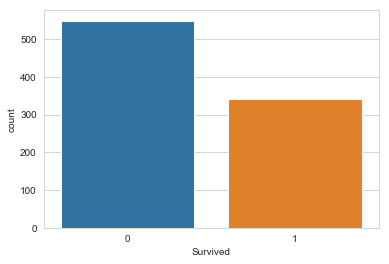

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data = df1)

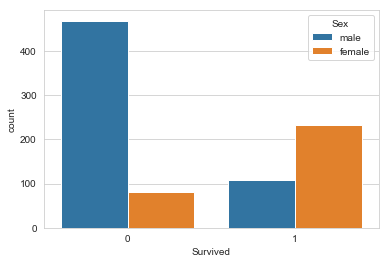

In [72]:
sns.countplot(x='Survived',data = df1,hue = 'Sex')

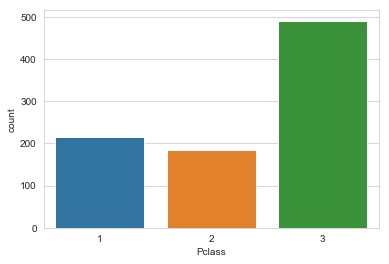

In [13]:
sns.countplot(x='Pclass',data = df)

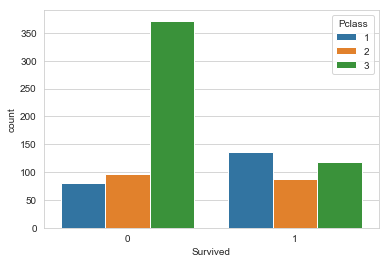

In [73]:
sns.countplot(x='Survived',data = df1,hue = 'Pclass')

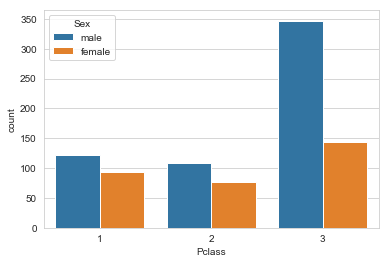

In [74]:
sns.countplot(x='Pclass',data = df1,hue = 'Sex')

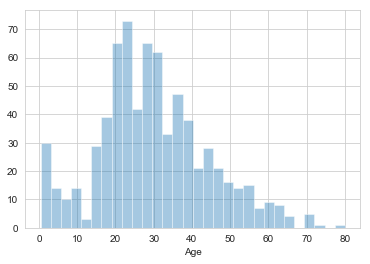

In [75]:
sns.distplot(df1['Age'].dropna(),kde=  False,bins =30 )

In [6]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
df1[df1['Age']<=10]['Age'].count()

64

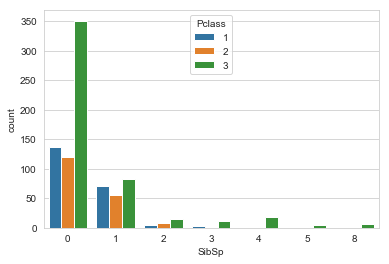

In [78]:
sns.countplot(df1['SibSp'],hue =df['Pclass'])

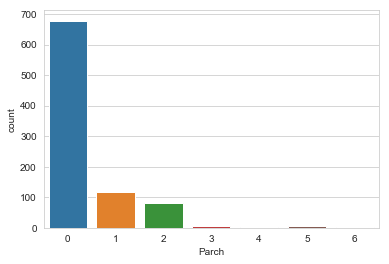

In [79]:
sns.countplot('Parch',data = df1)

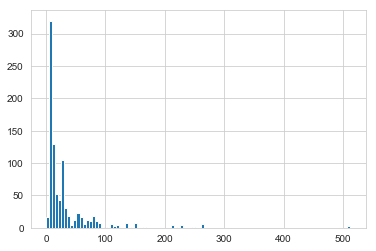

In [9]:
df1['Fare'].hist(bins =100)

In [10]:
import cufflinks as cf
cf.go_offline()

In [12]:
df1['Fare'].iplot(kind = 'hist')

In [13]:
cols = df1[['Age','Pclass']]


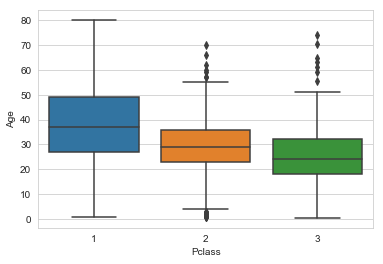

In [82]:
sns.boxplot(x = "Pclass",y='Age',data = df1)

In [14]:
def impute(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 36
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

In [15]:
df1['Age']=cols.apply(impute,axis=1)
df1.drop('Cabin',inplace =True,axis =1)


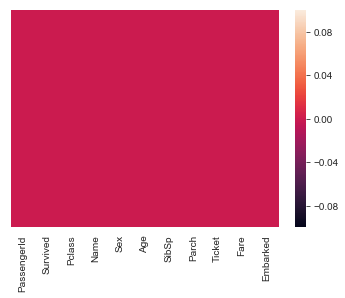

In [86]:
sns.heatmap(df1.isnull(),yticklabels = False)

In [85]:
df1.dropna(inplace = True)

In [29]:
def dumy(sex):
    if sex=="male":
        return 1
    else:
        return 0


In [30]:
df1['Sex']=df1['Sex'].apply(dumy)

In [88]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [90]:
embark = pd.get_dummies(df1['Embarked'],drop_first =True) # as strings can't be fed into ml algorithm

In [91]:
df1=pd.concat([df1,embark],axis = 1)

In [66]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [16]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [17]:
df1.drop(['Ticket','Embarked','PassengerId','Name'],inplace =True,axis=1)

In [18]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import train_test_split

In [31]:
X = df1.drop('Survived',axis =1)
y = df1['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
predictions = logmodel.predict(X_test)

In [41]:
squarederror = 1/(len(X_test)*(sum((predictions-y_test)**2))

SyntaxError: unexpected EOF while parsing (<ipython-input-41-5f590fba97de>, line 1)

In [51]:
squarederror = sum((predictions-y_test)**2)/len(X_test)
squarederror

0.22761194029850745

In [48]:
from sklearn import metrics

In [50]:
metrics.mean_absolute_error(predictions,y_test)

0.22761194029850745

In [52]:
metrics.mean_squared_error(predictions,y_test)

0.22761194029850745

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(confusion_matrix(predictions,y_test))

[[133  40]
 [ 21  74]]
